In [16]:
#python function for plotting the data in csv_data
import os
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import datetime

In [68]:
def dam_variables_plot(*directoryPath):
    for csv_file in directoryPath:
        f=open(csv_file, "r")
        lines = f.readlines()[1:] #skip column headers
        reader = csv.reader(lines, delimiter=",") 
        date_range =[]
        var_values = []
        for row in reader:
            date_range.append(row[0])
            var_values.append(row[1])  

        date_range.pop() #remove last item as no data for current day/month
        var_values.pop()

        date_range_int = []
        for date in date_range:
            date = datetime.datetime.strptime(date, '%m/%d/%Y')
            date_range_int.append(date)

        var_values_int =[]
        for val in var_values:
            if "," in val:
                val= float(val.replace(',', '')) #convert data to int from string, ignore numerical commas
                var_values_int.append(val)
            else:
                val = float(val)
                var_values_int.append(val)
        
        data = pd.read_csv(csv_file)
        column_names = list(data.columns)
        #plotting
        plt.plot(date_range_int, var_values_int)
        plt.xlabel("{}".format(column_names[0]))
        plt.ylabel("{}".format(column_names[1]))

        plt.show()

        #table
        df = pd.DataFrame(data)

        print (df)


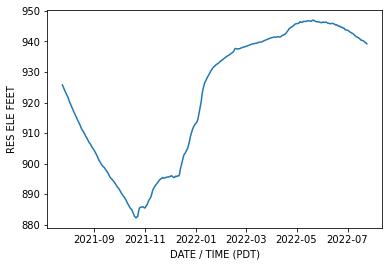

    DATE / TIME (PDT) RES ELE FEET  Unnamed: 2
0          07/25/2021       925.78         NaN
1          07/26/2021       925.09         NaN
2          07/27/2021       924.44         NaN
3          07/28/2021       923.84         NaN
4          07/29/2021       923.17         NaN
..                ...          ...         ...
361        07/21/2022       939.93         NaN
362        07/22/2022       939.75         NaN
363        07/23/2022       939.51         NaN
364        07/24/2022       939.25         NaN
365        07/25/2022           --         NaN

[366 rows x 3 columns]


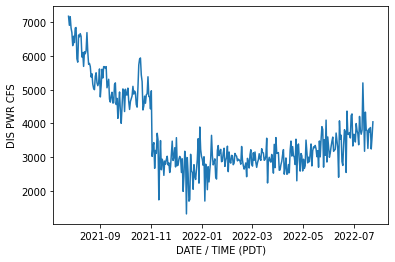

    DATE / TIME (PDT) DIS PWR CFS  Unnamed: 2
0          07/25/2021       7,182         NaN
1          07/26/2021       6,912         NaN
2          07/27/2021       7,167         NaN
3          07/28/2021       6,835         NaN
4          07/29/2021       6,695         NaN
..                ...         ...         ...
361        07/21/2022       3,878         NaN
362        07/22/2022       3,241         NaN
363        07/23/2022       3,605         NaN
364        07/24/2022       4,047         NaN
365        07/25/2022          --         NaN

[366 rows x 3 columns]


In [69]:
dam_variables_plot("/Users/cpapalaz/dam-water-level/csv_data/res_elevation_daily.csv", "/Users/cpapalaz/dam-water-level/csv_data/discharge_powergen_daily.csv")